### satellite image classification

#### Introduction

##### In the satellite image classification task, your dataset contains four main classes: **desert**, **cloudy**, **green area**, and **water**. The goal is to train a model that can accurately distinguish between these land types based on the visual and spectral features in the satellite images.

Here’s a breakdown of these classes:

1. **Desert**: These regions are typically characterized by barren land with minimal vegetation. Deserts often have specific spectral signatures, like high reflectance in visible bands and low reflectance in vegetation-sensitive infrared bands.
  
2. **Cloudy**: Clouds can obscure the Earth's surface and present challenges in classification. They have unique spectral signatures, especially in the visible and near-infrared spectrum, that allow for distinguishing between clouds and other land types.

3. **Green Area**: These are regions covered by vegetation, such as forests, grasslands, or agricultural areas. Green areas have a distinct signature in the near-infrared region due to the reflection from chlorophyll in plants.

4. **Water**: Bodies of water such as lakes, rivers, and oceans tend to absorb light in the visible spectrum and reflect in certain infrared bands. These regions typically appear dark in satellite images compared to other land classes.

### Image Classification Workflow for this Dataset:
1. **Data Preprocessing**:
   - Normalize the images to account for different lighting conditions.
   - Perform data augmentation (e.g., rotation, scaling) to improve model generalization.

2. **Feature Extraction**:
   - Extract spectral bands (e.g., RGB, near-infrared) that highlight differences between classes.
   - Optionally, apply dimensionality reduction techniques like PCA.

3. **Model Training**:
   - You can use machine learning or deep learning models (e.g., Convolutional Neural Networks - CNNs).
   - Supervised classification will allow you to label and classify the different areas based on training images.

4. **Evaluation**:
   - Evaluate the model using metrics such as confusion matrix ,heatmap ensuring the model effectively distinguishes between desert, cloudy, green area, and water.

In [4]:
# import necessary libariries

import cv2 as cv
from tqdm import tqdm 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split 
import tensorflow as tf 
from keras import layers 
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy 
from keras.optimizers import Adam 
from sklearn.preprocessing import LabelEncoder 
import pandas as pd 
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report 
import glob

In [5]:
# fetch the data

water = glob.glob('data/water/*.jpg')
green_area = glob.glob('data/green_area/*.jpg')
desert = glob.glob('data/desert/*.jpg')
cloudy = glob.glob('data/cloudy/*.jpg')

In [6]:
# classes

classes_data = {
    'cloudy': cloudy,
    'water': water,
    'green_area': green_area,
    'desert': desert
}

In [7]:
images_arr = []

for class_name, images in tqdm(classes_data.items()): 
    for img_path in images:
        img_arr = cv.imread(img_path)
        img_arr = cv.resize(img_arr, (128, 128))
        images_arr.append((class_name, img_arr))

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.16s/it]


In [8]:
# single image

images_arr[0]

('cloudy',
 array([[[121, 146, 152],
         [126, 151, 155],
         [133, 156, 163],
         ...,
         [179, 199, 204],
         [181, 201, 206],
         [183, 202, 207]],
 
        [[123, 148, 152],
         [127, 152, 155],
         [133, 156, 162],
         ...,
         [177, 197, 202],
         [179, 199, 204],
         [181, 200, 205]],
 
        [[127, 150, 155],
         [129, 154, 159],
         [132, 155, 162],
         ...,
         [175, 195, 200],
         [177, 197, 202],
         [179, 198, 203]],
 
        ...,
 
        [[207, 206, 227],
         [208, 206, 227],
         [209, 206, 227],
         ...,
         [127, 153, 148],
         [128, 154, 150],
         [129, 154, 150]],
 
        [[207, 206, 227],
         [208, 206, 227],
         [209, 206, 227],
         ...,
         [126, 152, 147],
         [128, 153, 148],
         [129, 154, 150]],
 
        [[207, 206, 227],
         [208, 206, 227],
         [209, 206, 227],
         ...,
         [126, 15

In [9]:
# creating list of classes 
class_names=[]
# creating list of images 
images_array=[]
for class_name , arr in images_arr : 
    class_names.append(class_name)
    images_array.append(arr)
result_dict={'class':class_names,'image':images_array}

In [10]:
# creating dataframe

df=pd.DataFrame(result_dict)

In [11]:
# viewing top 5 row

df.head()

,class,image
0,cloudy,"[[[121, 146, 152], [126, 151, 155], [133, 156,..."
1,cloudy,"[[[165, 173, 164], [166, 173, 165], [167, 173,..."
2,cloudy,"[[[147, 163, 161], [147, 163, 161], [147, 163,..."
3,cloudy,"[[[139, 149, 154], [140, 149, 154], [138, 149,..."
4,cloudy,"[[[125, 145, 163], [128, 145, 164], [128, 145,..."


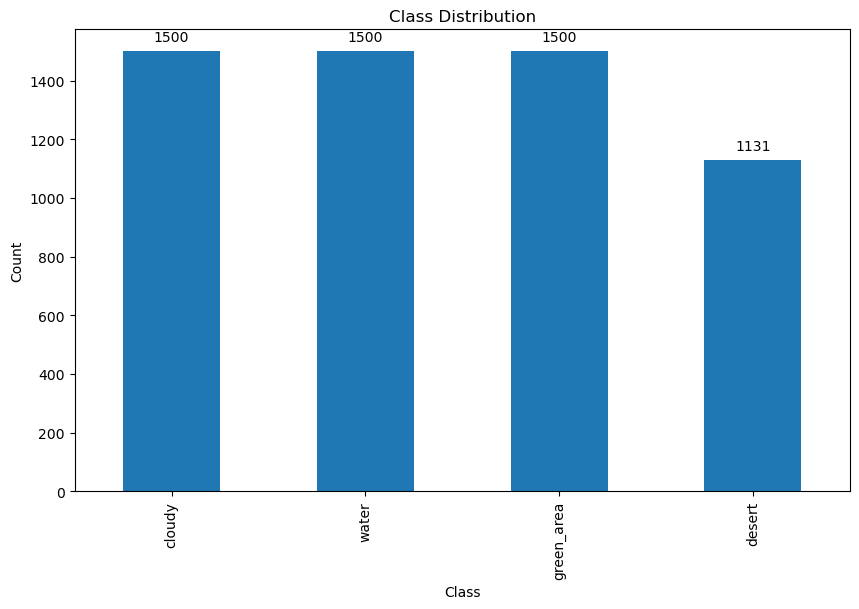

In [17]:
# Generate the bar plot
ax = df['class'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Display the plot
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [12]:
# scaling images 

df_1=df.copy()
df_1['image']=df_1['image'].apply(lambda x : x/255)
df_1

,class,image
0,cloudy,"[[[0.4745098039215686, 0.5725490196078431, 0.5..."
1,cloudy,"[[[0.6470588235294118, 0.6784313725490196, 0.6..."
2,cloudy,"[[[0.5764705882352941, 0.6392156862745098, 0.6..."
3,cloudy,"[[[0.5450980392156862, 0.5843137254901961, 0.6..."
4,cloudy,"[[[0.49019607843137253, 0.5686274509803921, 0...."
...,...,...
5626,desert,"[[[0.5686274509803921, 0.6431372549019608, 0.6..."
5627,desert,"[[[0.5725490196078431, 0.6470588235294118, 0.6..."
5628,desert,"[[[0.5725490196078431, 0.6470588235294118, 0.6..."
5629,desert,"[[[0.5647058823529412, 0.6509803921568628, 0.6..."


In [13]:
# importing label encoder

from sklearn.preprocessing import LabelEncoder

In [14]:
# encoding class column  
encoder=LabelEncoder() 
df_1['class']=encoder.fit_transform(df_1['class'])
df_1.head()

,class,image
0,0,"[[[0.4745098039215686, 0.5725490196078431, 0.5..."
1,0,"[[[0.6470588235294118, 0.6784313725490196, 0.6..."
2,0,"[[[0.5764705882352941, 0.6392156862745098, 0.6..."
3,0,"[[[0.5450980392156862, 0.5843137254901961, 0.6..."
4,0,"[[[0.49019607843137253, 0.5686274509803921, 0...."


In [16]:
# CNN 

num_classes = 4

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [17]:
# Compile the model
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
# summary

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,412,836 (32.09 MB)

 Trainable params: 8,412,836 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#  features  are scaled images 

X=df_1['image'] 
y=df_1['class']

In [20]:
# splitting into train and test  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [21]:
# shape of X_train and y_train 
X_train.shape 

(4504,)

In [22]:
y_train.shape

(4504,)

In [23]:
# Convert X_train ,y_train ,X_test ,X_train
X_train = np.array([np.array(x, dtype=np.float32) for x in X_train])
y_train = np.array(y_train)

X_test = np.array([np.array(x, dtype=np.float32) for x in X_test])
y_test = np.array(y_test)

In [24]:
# train the model
batch_size = 32
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,steps_per_epoch=15, batch_size=batch_size)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 752ms/step - accuracy: 0.3169 - loss: 1.4626 - val_accuracy: 0.7276 - val_loss: 0.6478
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 665ms/step - accuracy: 0.5929 - loss: 0.6564 - val_accuracy: 0.7640 - val_loss: 0.4941
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 695ms/step - accuracy: 0.7709 - loss: 0.4897 - val_accuracy: 0.7028 - val_loss: 0.5038
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 696ms/step - accuracy: 0.7709 - loss: 0.4695 - val_accuracy: 0.7870 - val_loss: 0.4894
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 677ms/step - accuracy: 0.8048 - loss: 0.4662 - val_accuracy: 0.7480 - val_loss: 0.6094
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 645ms/step - accuracy: 0.7638 - loss: 0.5240 - val_accuracy: 0.8580 - val_loss: 0.3486
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 703ms/step - accuracy: 0.8579 - loss: 0.3170 - val_accuracy: 0.8279 - val_loss: 0.3720
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 660ms/step - accuracy: 0.8255 - loss: 0.3642 - val_accur

C:\Users\Abino\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 400ms/step - accuracy: 0.8838 - loss: 0.3260 - val_accuracy: 0.8323 - val_loss: 0.4267


In [25]:
# evaluate the model

model.evaluate(X_train ,y_train)

141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.8514 - loss: 0.3995


[0.39778026938438416, 0.8534635901451111]

In [26]:
# make predictions in X_test

y_pred = model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [27]:
y_pred[:5]

array([[2.7652882e-04, 8.7672233e-06, 9.1640520e-01, 8.3309546e-02],
       [3.2232178e-06, 6.2135052e-07, 8.0963755e-03, 9.9189985e-01],
       [1.6605067e-04, 6.5265904e-06, 9.3521965e-01, 6.4607784e-02],
       [2.5231382e-04, 6.7268161e-06, 8.6403906e-01, 1.3570186e-01],
       [1.5333387e-04, 3.9706320e-06, 9.0290213e-01, 9.6940555e-02]],
      dtype=float32)

In [28]:
# Use np.argmax to fetch indices of max element of the array

pred_values=[np.argmax(i) for i in y_pred]

In [29]:
y_pred[:5]

array([[2.7652882e-04, 8.7672233e-06, 9.1640520e-01, 8.3309546e-02],
       [3.2232178e-06, 6.2135052e-07, 8.0963755e-03, 9.9189985e-01],
       [1.6605067e-04, 6.5265904e-06, 9.3521965e-01, 6.4607784e-02],
       [2.5231382e-04, 6.7268161e-06, 8.6403906e-01, 1.3570186e-01],
       [1.5333387e-04, 3.9706320e-06, 9.0290213e-01, 9.6940555e-02]],
      dtype=float32)

In [30]:
# Plot X_test with label from our prediction

labels = {0 : 'cloudy' ,1:'water' ,2:'green_area' ,3:'desert'}

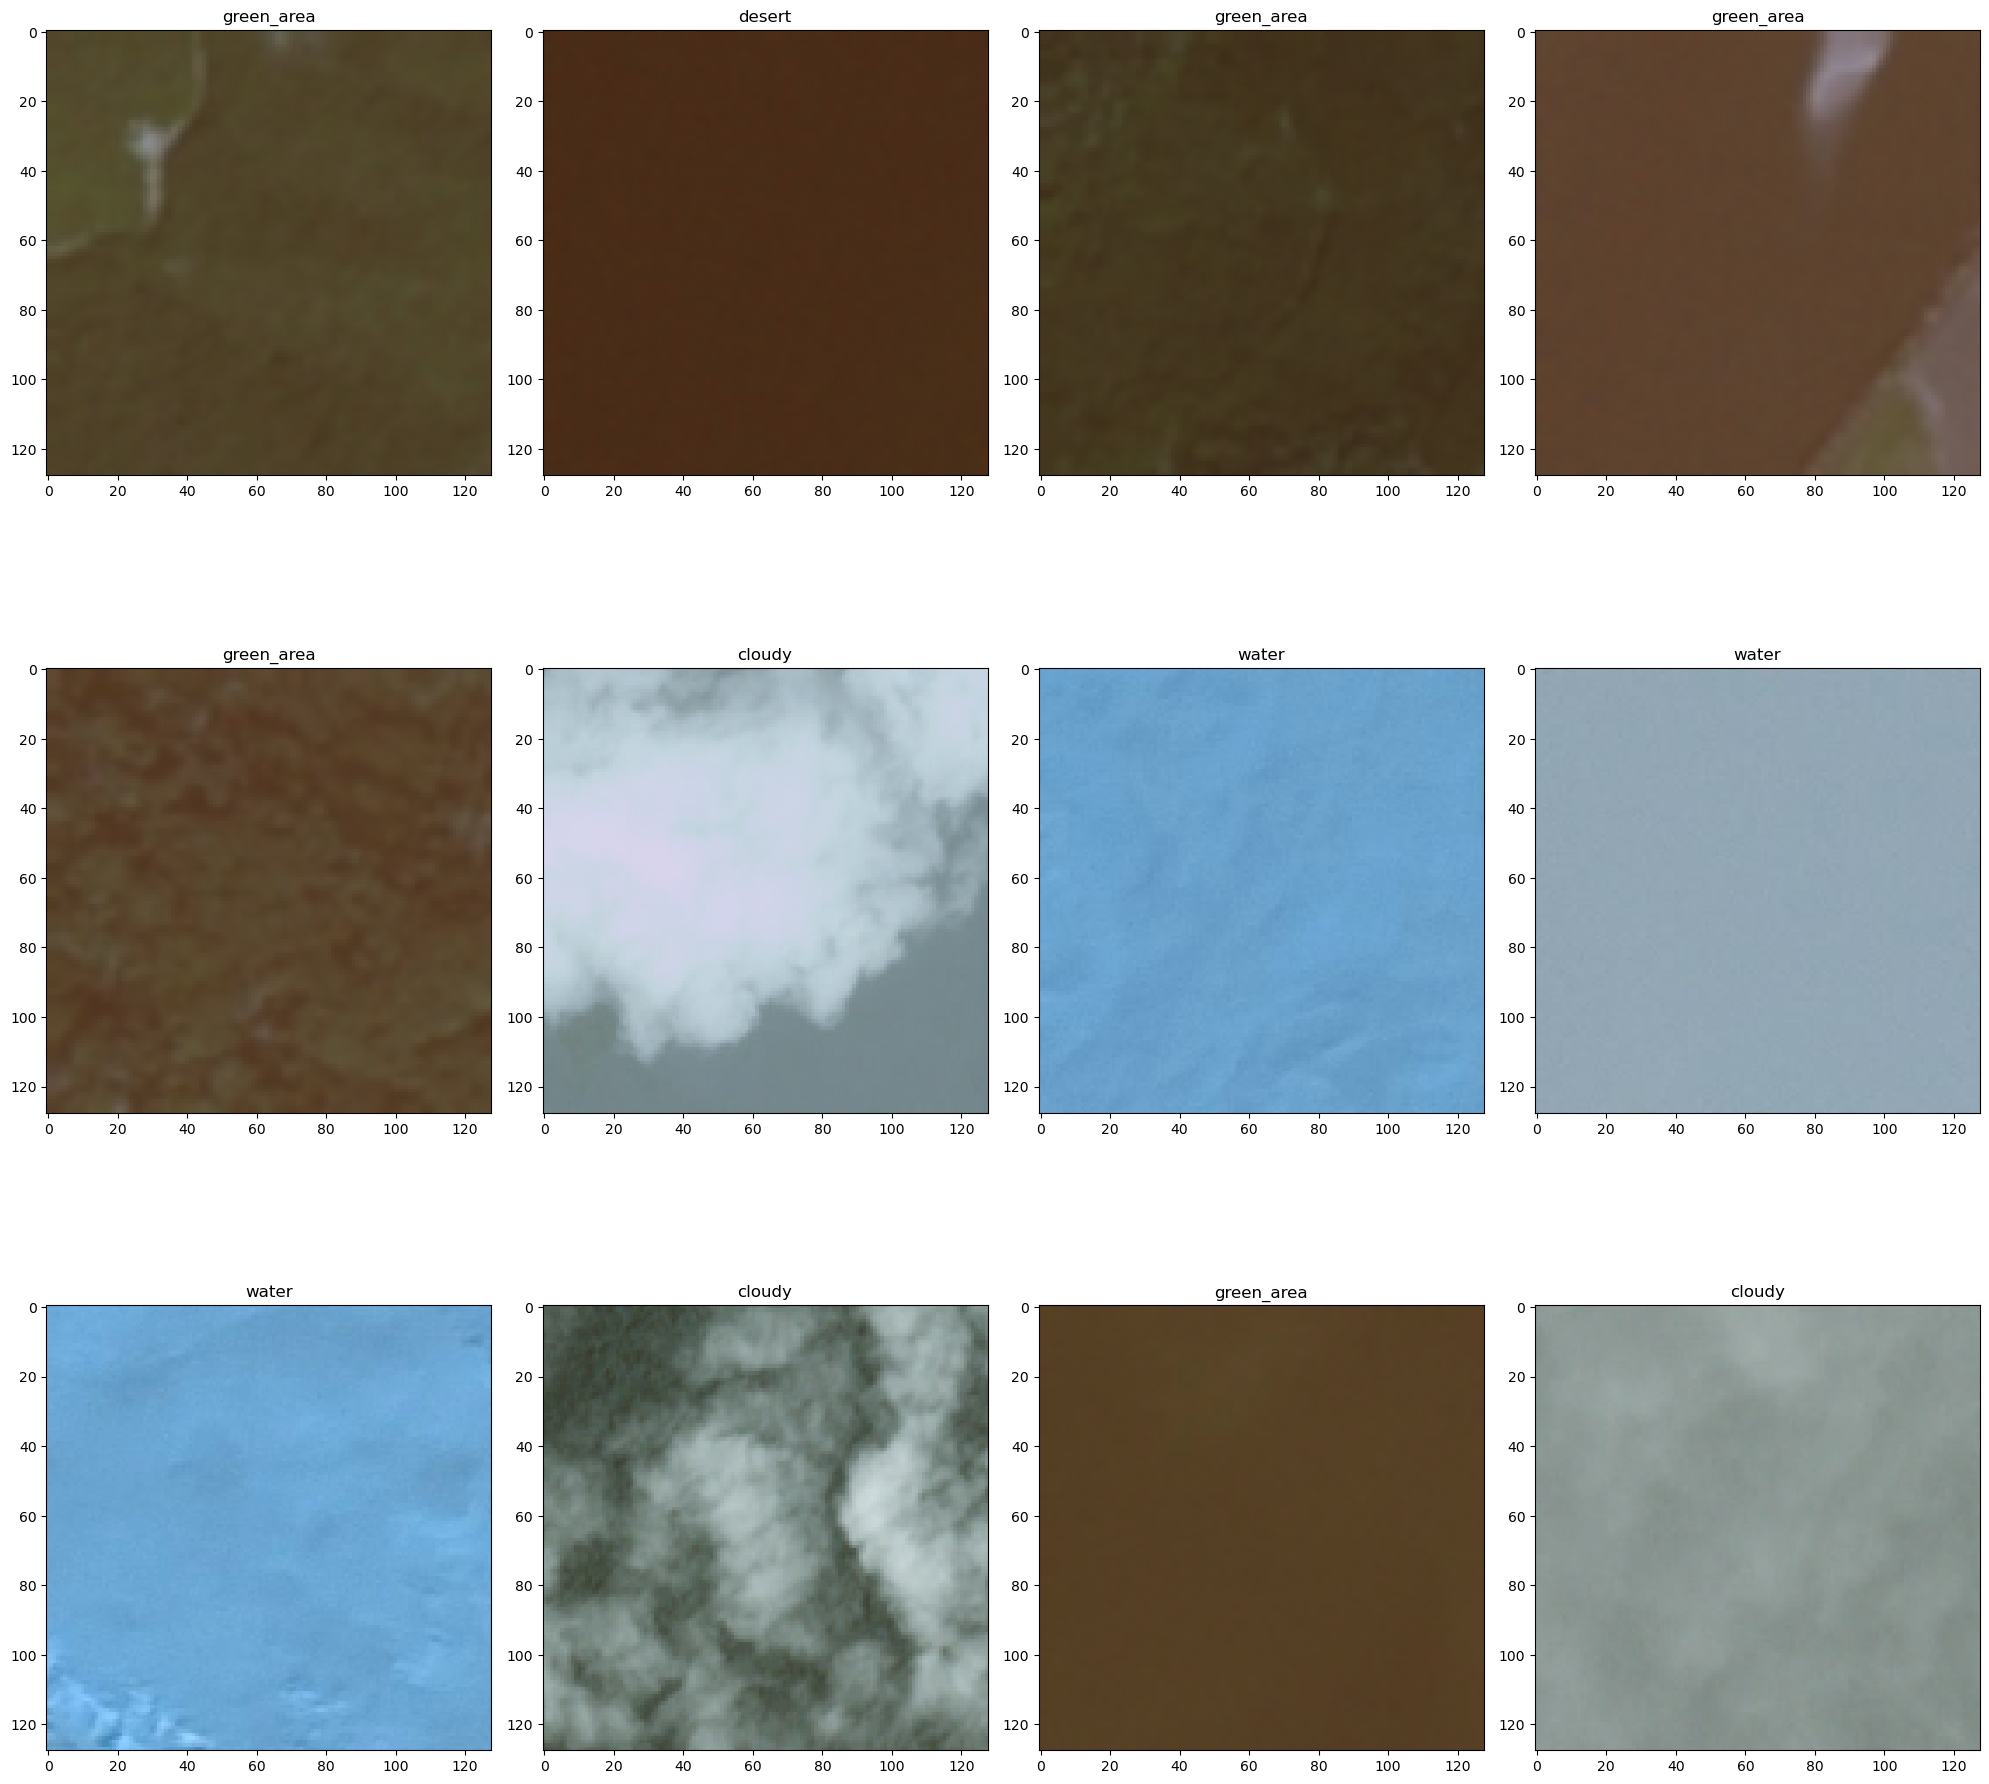

In [31]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    plt.title(labels[pred_values[i]])
plt.tight_layout()

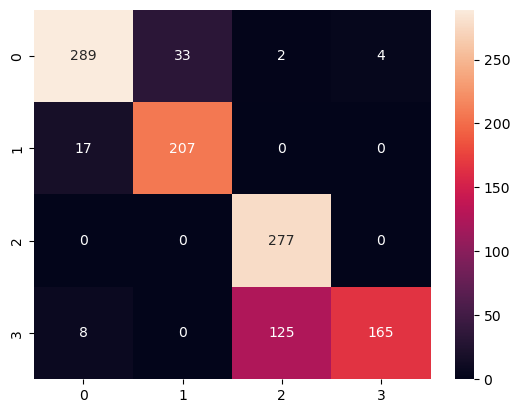

In [32]:
# visualise confusion matrix on heatmap

sns.heatmap(confusion_matrix(y_test,pred_values),annot=True,fmt='d')
plt.show()